In [137]:
from dateutil.parser import parse
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics




#data_path_write = 'C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Time_predictions_on_all_columns\\'
#fa = pd.read_csv(data_path)
#entire_dataset = pd.read_csv(data_path2)

Function to pick which data to perform time prediction analysis on. 1 is for emails received, 2 is all gmail data, 3 is the five attributes

In [138]:
def pick_your_poison(number):
    if (number == 1):
        df = pd.read_csv("C:\\Users\\augus\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Data\\cbt.csv")
        print("You picked cbt.csv")
    if (number == 2):
        df = pd.read_csv("C:\\Users\\augus\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Data\\gmail_df.csv")
        print("You picked overall data")
    if (number == 3):
        df = pd.read_csv("C:\\Users\\augus\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Data\\gmail_df.csv")
        df = df[['time','emails_received','emails_sent','inbound_rejected_emails','inbound_spam_emails','inbound_non_spam_emails']]
        print("The five attributes")
    else:
        df = []
        print("No dataset for you")
    return df
    

Function to pass column time as a date time object and set time as an index. It is important for plotting

In [139]:
def time_set(df):
    import datetime as dt
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]],utc = True)
    df[df.columns[0]]= df.time.dt.date
    df.set_index(df.columns[0], inplace=True)
    return df

Function to plot the predicted values and the original data

In [140]:
def plot(df,df0):
    df1 = df.copy()
    df2 = df0.copy()
    df1 = time_set(df1)
    df2 = time_set(df2)
    for x in range(len(df1.columns)):
        plt.figure(figsize=(22, 10))
        plt.plot(df1.index, df1[df1.columns[x]], label=df1.columns[x])
        plt.plot(df2.index, df2[df2.columns[x]], label='Prophet', color='r')
        plt.legend(loc='best', fontsize='xx-large')
        plt.show()

Function to do time prediction

In [141]:
def timeprediction123(df,csvfilename):
    p = Prophet(weekly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.7)
    #changepoint_prior changes the fit of the prediction
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    df_cv = cross_validation(p, initial='370 days', period='180 days', horizon = '365 days')
    df_p = performance_metrics(df_cv)
    print("Performance head for " + csvfilename)
    print(df_p.head())
    print("Performance tail for " + csvfilename)
    print(df_p.tail())

    
    #df1.to_csv(data_path_write + csvfilename)
    df2 = time_pred[['yhat']]
    p.plot(time_pred)
    return df1,df2,time_pred

Function to send all columns in a dataframe to timeprediction123

In [142]:
def send_prediction(df):
    df_with_all_preds = timeprediction123(df = df[['time', df.columns[1]]], csvfilename = df.columns[1] + '_time_prediction.csv')[0]
    df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : five_att.columns[1]})
    df1= df.drop(columns= [five_att.columns[1]])
    
    for x in range(len(df1.columns) - 1):
        h =timeprediction123(df = df1[['time', df1.columns[x+1]]], csvfilename = df1.columns[x+1] + '_time_prediction.csv')[0]
        h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : df1.columns[x+1]})
        df_with_all_preds =  df_with_all_preds.merge(h, on = "time")
    return df_with_all_preds

Time prediction actually begins here

In [143]:
five_att = pick_your_poison(3)

The five attributes


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-08-27 00:00:00 and 2018-08-17 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for emails_received_time_prediction.csv
  horizon           mse           rmse           mae  coverage
0 37 days  1.063875e+10  103144.327645  72638.334515  0.641854
1 38 days  1.064978e+10  103197.775337  72966.972450  0.631461
2 39 days  1.071549e+10  103515.641301  73504.380186  0.623596
3 40 days  1.086250e+10  104223.317168  74317.187624  0.616854
4 41 days  1.149331e+10  107206.863179  75915.532634  0.611236
Performance tail for emails_received_time_prediction.csv
     horizon           mse           rmse           mae  coverage
324 361 days  9.624030e+09   98102.141934  78303.361675       1.0
325 362 days  9.767624e+09   98831.291454  79093.797753       1.0
326 363 days  1.011600e+10  100578.336621  81025.210681       1.0
327 364 days  1.042279e+10  102092.043915  82491.222367       1.0
328 365 days  1.067501e+10  103319.941951  83489.210075       1.0


INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-08-27 00:00:00 and 2018-08-17 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for emails_sent_time_prediction.csv
  horizon           mse          rmse          mae  coverage
0 37 days  1.135828e+08  10657.523394  7663.789091  0.669944
1 38 days  1.137079e+08  10663.392418  7668.378906  0.670787
2 39 days  1.145202e+08  10701.413367  7727.414723  0.665169
3 40 days  1.169416e+08  10813.951763  7815.075722  0.659551
4 41 days  1.252543e+08  11191.705119  8023.918215  0.653933
Performance tail for emails_sent_time_prediction.csv
     horizon           mse         rmse          mae  coverage
324 361 days  6.092425e+07  7805.398956  5443.234480  0.994382
325 362 days  6.030276e+07  7765.485228  5394.485479  0.994382
326 363 days  6.220857e+07  7887.240973  5447.609068  0.994382
327 364 days  6.176887e+07  7859.317210  5463.522030  0.994382
328 365 days  6.185551e+07  7864.827426  5502.099955  0.994382


INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-08-27 00:00:00 and 2018-08-17 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for inbound_rejected_emails_time_prediction.csv
  horizon           mse          rmse          mae      mape  coverage
0 37 days  1.434504e+08  11977.076514  6567.533752  0.384347  0.876404
1 38 days  1.549138e+08  12446.438950  6781.964760  0.392789  0.873034
2 39 days  1.642346e+08  12815.406002  6960.662393  0.401722  0.873034
3 40 days  2.432327e+08  15595.919538  7643.244993  0.413607  0.867416
4 41 days  2.663361e+08  16319.806176  8040.934283  0.434724  0.859551
Performance tail for inbound_rejected_emails_time_prediction.csv
     horizon           mse          rmse           mae      mape  coverage
324 361 days  6.152078e+08  24803.382980  19549.468634  2.964250       1.0
325 362 days  6.180281e+08  24860.170036  19611.683346  2.982426       1.0
326 363 days  6.236441e+08  24972.867623  19724.410723  3.013531       1.0
327 364 days  6.250105e+08  25000.209251  19748.989436  3.031757       1.0
328 365 days  6.099041e+08  24696.235858  19598.205515  3.057537     

INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-08-27 00:00:00 and 2018-08-17 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for inbound_spam_emails_time_prediction.csv
  horizon           mse          rmse          mae      mape  coverage
0 37 days  9.256396e+07   9621.016827  7318.018081  0.213389  0.759831
1 38 days  9.474125e+07   9733.511537  7399.084644  0.217460  0.758427
2 39 days  1.005092e+08  10025.427615  7610.438961  0.224520  0.747191
3 40 days  1.070698e+08  10347.452886  7889.226829  0.232287  0.738202
4 41 days  1.109977e+08  10535.542723  8040.367691  0.237438  0.738202
Performance tail for inbound_spam_emails_time_prediction.csv
     horizon           mse          rmse           mae      mape  coverage
324 361 days  7.682302e+08  27716.965777  19693.303806  0.834339       1.0
325 362 days  7.672593e+08  27699.446068  19755.599260  0.831326       1.0
326 363 days  7.566741e+08  27507.709364  19719.576734  0.834576       1.0
327 364 days  7.486678e+08  27361.795289  19698.846304  0.840132       1.0
328 365 days  7.530992e+08  27442.653688  19777.062626  0.845944       1.0


INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-08-27 00:00:00 and 2018-08-17 00:00:00


Performance head for inbound_non_spam_emails_time_prediction.csv
  horizon           mse          rmse           mae      mape  coverage
0 37 days  1.317894e+09  36302.816185  28385.771155  0.158986  0.664326
1 38 days  1.381761e+09  37172.042002  29154.815395  0.162070  0.650562
2 39 days  1.424802e+09  37746.544387  29391.705309  0.162627  0.650562
3 40 days  1.507902e+09  38831.710463  30233.590498  0.169038  0.639326
4 41 days  1.553794e+09  39418.197358  30760.114585  0.173529  0.631461
Performance tail for inbound_non_spam_emails_time_prediction.csv
     horizon           mse          rmse           mae      mape  coverage
324 361 days  5.928211e+09  76994.876461  67311.089280  0.441013  0.896629
325 362 days  5.995160e+09  77428.419534  67631.109014  0.439034  0.902247
326 363 days  6.182256e+09  78627.322392  68532.111730  0.437984  0.904494
327 364 days  6.347465e+09  79670.978264  69365.551447  0.438490  0.904494
328 365 days  6.412901e+09  80080.592092  69882.876172  0.44011

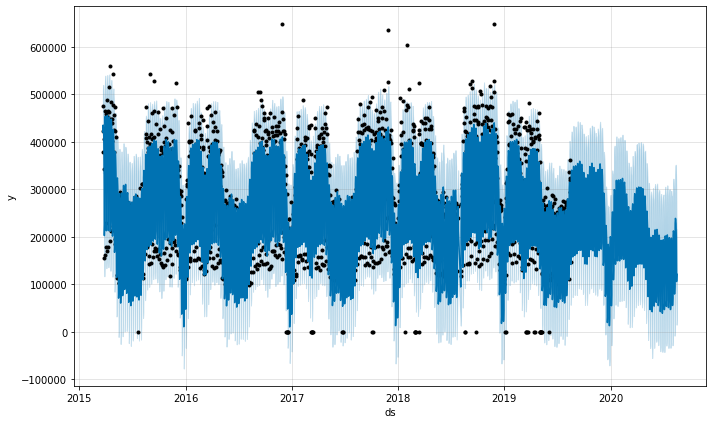

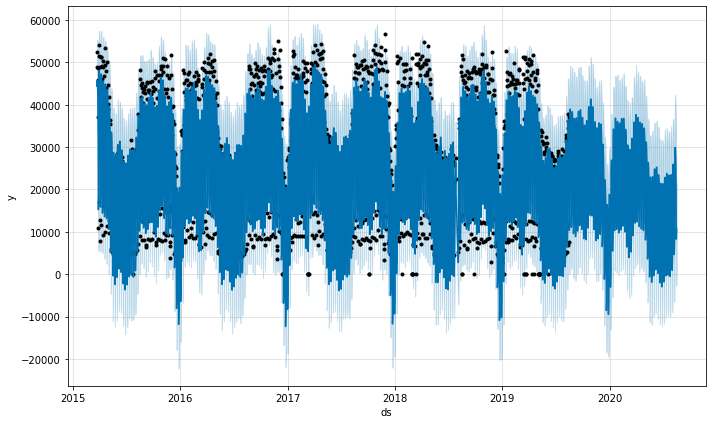

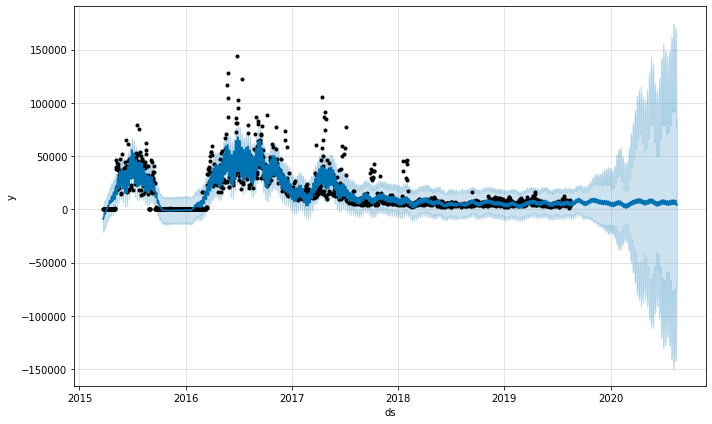

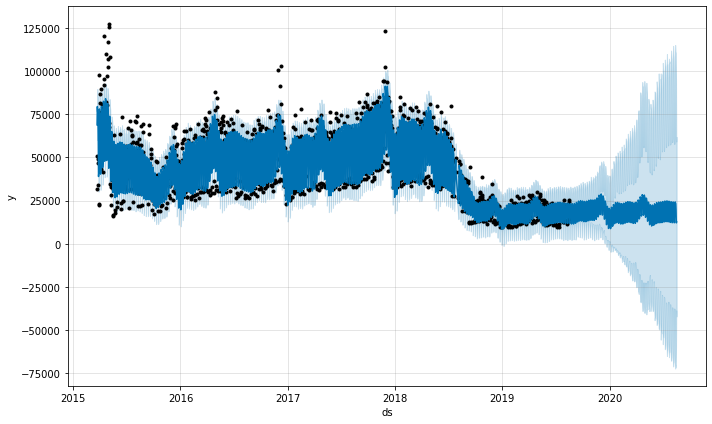

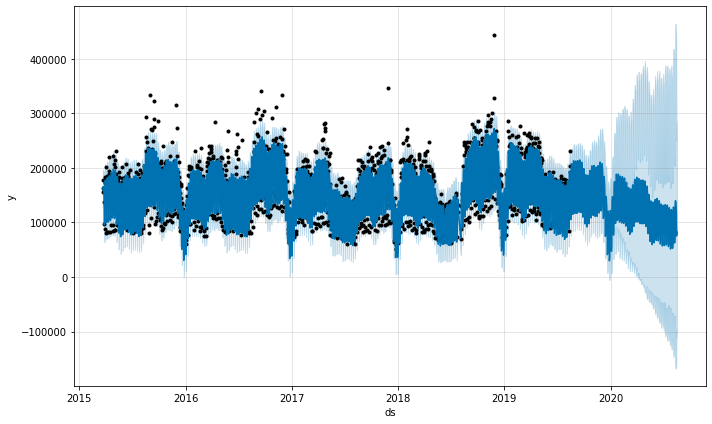

In [144]:
prediction = send_prediction(five_att)

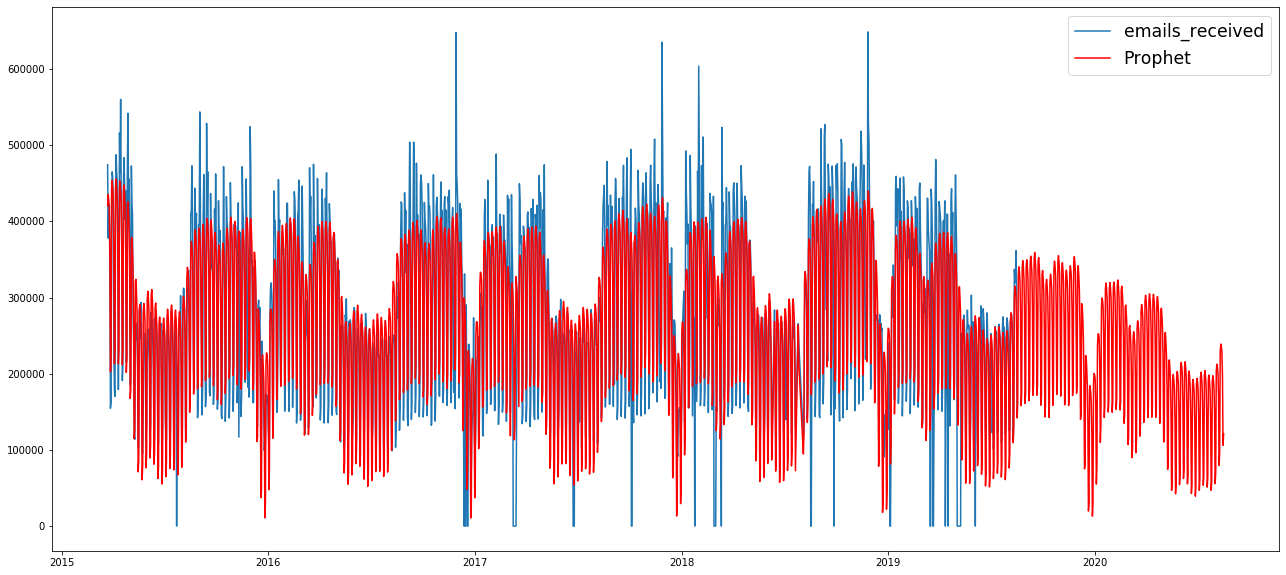

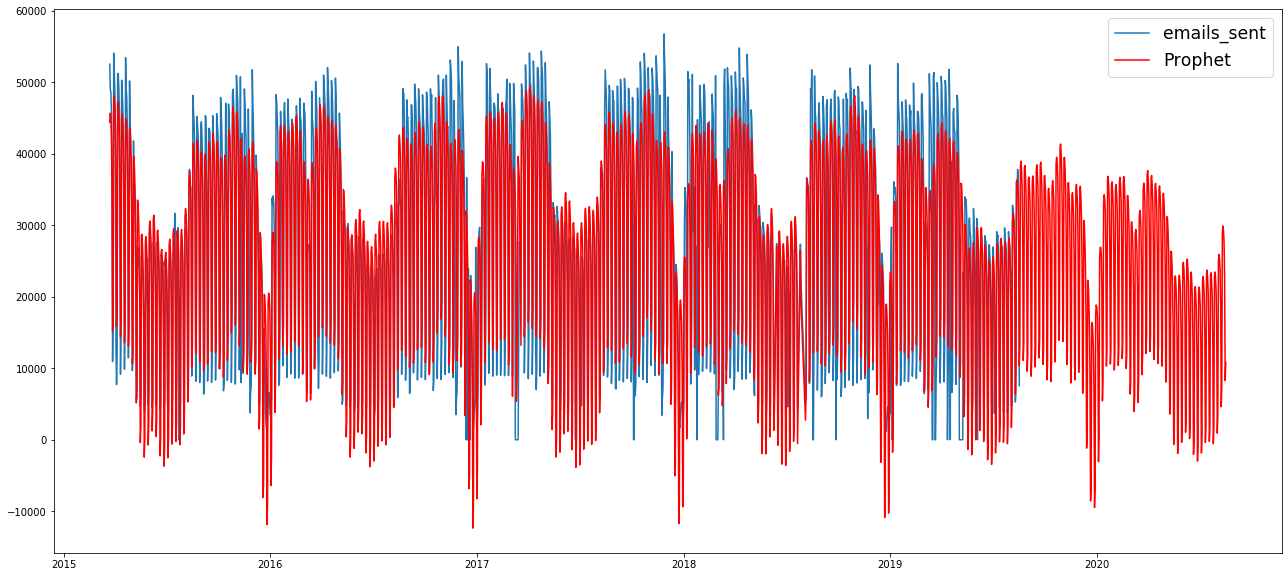

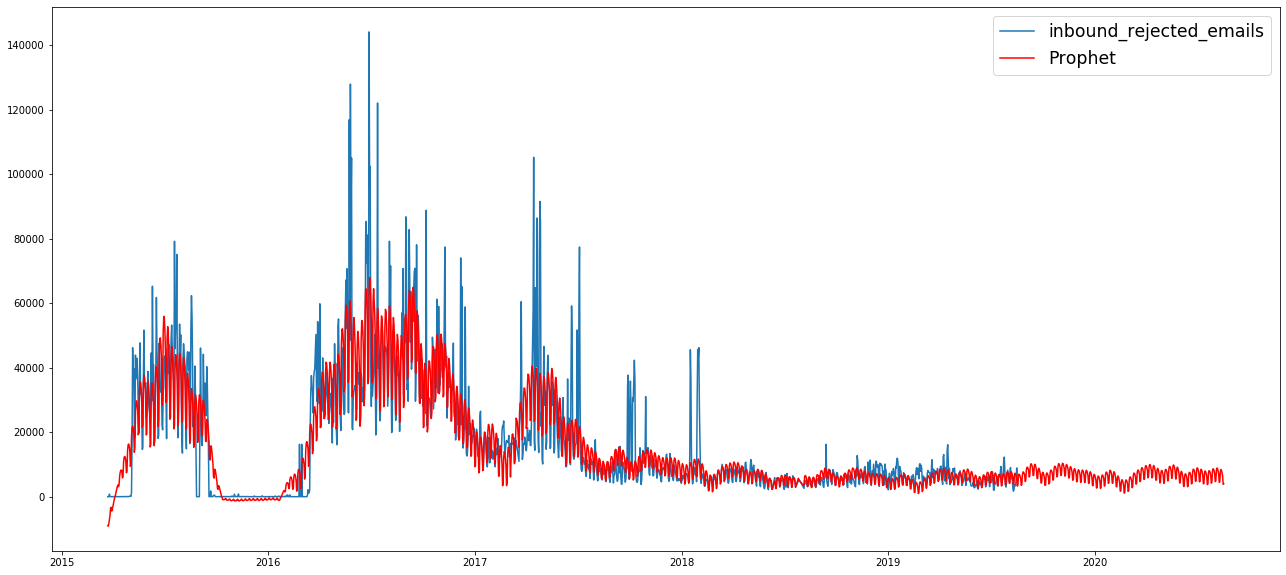

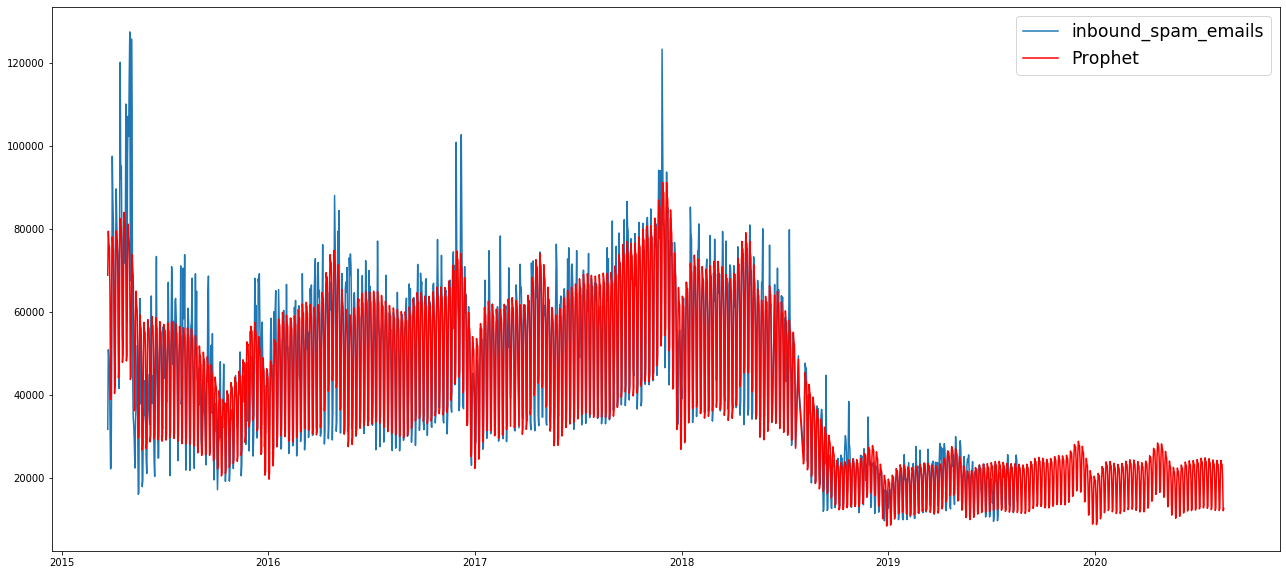

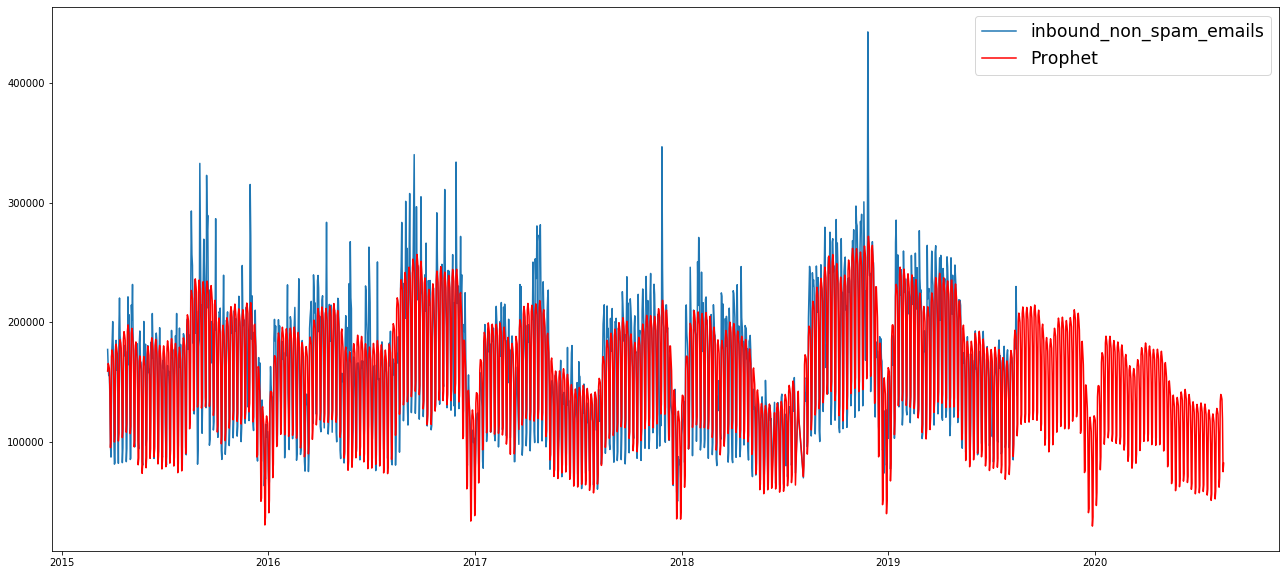

In [145]:
plot(five_att,prediction)

In [146]:
prediction

,time,emails_received,emails_sent,inbound_rejected_emails,inbound_spam_emails,inbound_non_spam_emails
0,2015-03-23,420751.178741,44416.560004,-9011.702713,68832.073538,159325.646064
1,2015-03-24,435382.645064,45682.977138,-9124.979106,79416.249246,165692.286979
2,2015-03-25,427943.748731,44706.242837,-8281.172344,76444.853147,164233.264236
3,2015-03-26,411576.525877,42390.299846,-7083.514472,75545.000854,161522.825442
4,2015-03-27,356726.773040,35314.818709,-5780.726718,63505.938412,143495.244656
5,2015-03-28,202683.559871,15226.040144,-3578.294468,38963.224620,95385.138377
6,2015-03-29,225692.031475,18532.375634,-3295.793501,40910.945840,102555.916784
7,2015-03-30,441919.458670,47359.429506,-4447.445185,67388.184048,171457.491562
8,2015-03-31,453821.164514,48117.520464,-4021.421321,78032.117079,176998.471316
9,2015-04-01,443783.656234,46630.571704,-3166.582610,75526.015462,174406.586773


Removing 0s when there is an outage

In [147]:
five_att_0_removed = pick_your_poison(3)

The five attributes


In [148]:
five_att_0_removed = five_att_0_removed [five_att_0_removed ['emails_received'] != 0] 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-08-27 00:00:00 and 2018-08-17 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for emails_received_time_prediction.csv
  horizon           mse          rmse           mae      mape  coverage
0 38 days  6.370809e+09  79817.347732  61605.774375  0.179890  0.571150
1 39 days  6.449424e+09  80308.304755  62486.939389  0.182379  0.564912
2 40 days  6.664521e+09  81636.519569  63834.009797  0.188216  0.555556
3 41 days  6.722694e+09  81992.035051  64263.241177  0.190504  0.550877
4 42 days  6.890087e+09  83006.548976  65047.927653  0.193814  0.556725
Performance tail for emails_received_time_prediction.csv
     horizon           mse           rmse           mae      mape  coverage
323 361 days  1.331961e+10  115410.617552  92699.590608  0.326479       1.0
324 362 days  1.351927e+10  116272.408213  93857.715457  0.326142       1.0
325 363 days  1.390942e+10  117938.189228  95919.063998  0.329520       1.0
326 364 days  1.421180e+10  119213.243038  97286.389345  0.331494       1.0
327 365 days  1.458382e+10  120763.487907  98594.307515  0.333097       1.

INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-08-27 00:00:00 and 2018-08-17 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for emails_sent_time_prediction.csv
  horizon           mse         rmse          mae      mape  coverage
0 38 days  6.109340e+07  7816.226496  6327.784723  0.238228  0.643275
1 39 days  6.219218e+07  7886.201800  6417.261798  0.240283  0.636257
2 40 days  6.541226e+07  8087.784433  6548.967286  0.251297  0.635088
3 41 days  6.603256e+07  8126.042264  6607.588210  0.255525  0.629240
4 42 days  6.635469e+07  8145.838630  6628.795727  0.258523  0.629240
Performance tail for emails_sent_time_prediction.csv
     horizon           mse         rmse          mae      mape  coverage
323 361 days  4.987613e+07  7062.303336  4860.540628  0.238353  0.994152
324 362 days  4.964835e+07  7046.158554  4838.951440  0.234471  0.994152
325 363 days  5.186546e+07  7201.767867  4917.222778  0.232383  0.994152
326 364 days  5.263805e+07  7255.208818  4995.103275  0.233349  0.994152
327 365 days  5.427026e+07  7366.835442  5065.480995  0.236634  0.994152


INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-08-27 00:00:00 and 2018-08-17 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for inbound_rejected_emails_time_prediction.csv
  horizon           mse          rmse          mae      mape  coverage
0 38 days  1.731919e+08  13160.241086  7469.005390  0.437257  0.853801
1 39 days  1.827179e+08  13517.319521  7658.380358  0.446750  0.852632
2 40 days  2.657631e+08  16302.241970  8384.957852  0.457321  0.846784
3 41 days  2.881543e+08  16975.107764  8758.346612  0.476875  0.839766
4 42 days  3.269728e+08  18082.389929  9270.045893  0.505390  0.830409
Performance tail for inbound_rejected_emails_time_prediction.csv
     horizon           mse          rmse           mae      mape  coverage
323 361 days  6.382615e+08  25263.836827  19657.908432  2.904431       1.0
324 362 days  6.432361e+08  25362.100037  19728.419075  2.928202       1.0
325 363 days  6.467718e+08  25431.708226  19797.919543  2.961817       1.0
326 364 days  6.354286e+08  25207.709543  19701.057091  2.981848       1.0
327 365 days  6.105117e+08  24708.535510  19458.730994  3.013633     

INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-08-27 00:00:00 and 2018-08-17 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for inbound_spam_emails_time_prediction.csv
  horizon           mse          rmse          mae      mape  coverage
0 38 days  1.073421e+08  10360.603718  7962.753985  0.235547  0.734893
1 39 days  1.138685e+08  10670.918336  8196.739638  0.243638  0.725146
2 40 days  1.214660e+08  11021.162699  8504.440698  0.252277  0.713450
3 41 days  1.227217e+08  11077.984065  8587.122678  0.252979  0.711111
4 42 days  1.253049e+08  11193.965448  8684.914644  0.259155  0.711111
Performance tail for inbound_spam_emails_time_prediction.csv
     horizon           mse          rmse           mae      mape  coverage
323 361 days  8.772562e+08  29618.510951  21154.903165  0.872645       1.0
324 362 days  8.739953e+08  29563.412143  21152.610729  0.867839       1.0
325 363 days  8.629867e+08  29376.634909  21129.954791  0.871483       1.0
326 364 days  8.523887e+08  29195.696515  21055.219863  0.877058       1.0
327 365 days  8.611151e+08  29344.762897  21167.300347  0.884159       1.0


INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-08-27 00:00:00 and 2018-08-17 00:00:00


Performance head for inbound_non_spam_emails_time_prediction.csv
  horizon           mse          rmse           mae      mape  coverage
0 38 days  1.487958e+09  38574.052983  30499.716434  0.169482  0.617934
1 39 days  1.543590e+09  39288.553559  30875.506916  0.170486  0.612865
2 40 days  1.637310e+09  40463.689625  31754.773545  0.176596  0.600000
3 41 days  1.647752e+09  40592.507968  31867.461760  0.179637  0.597661
4 42 days  1.693504e+09  41152.209603  32450.642365  0.185621  0.588304
Performance tail for inbound_non_spam_emails_time_prediction.csv
     horizon           mse          rmse           mae      mape  coverage
323 361 days  5.686014e+09  75405.663197  65850.764744  0.428075  0.894737
324 362 days  5.747542e+09  75812.544735  66085.867081  0.425366  0.894737
325 363 days  5.930405e+09  77009.121904  66949.068712  0.424256  0.888889
326 364 days  6.059595e+09  77843.403589  67698.610144  0.425418  0.891228
327 365 days  6.094531e+09  78067.475812  68092.730423  0.42705

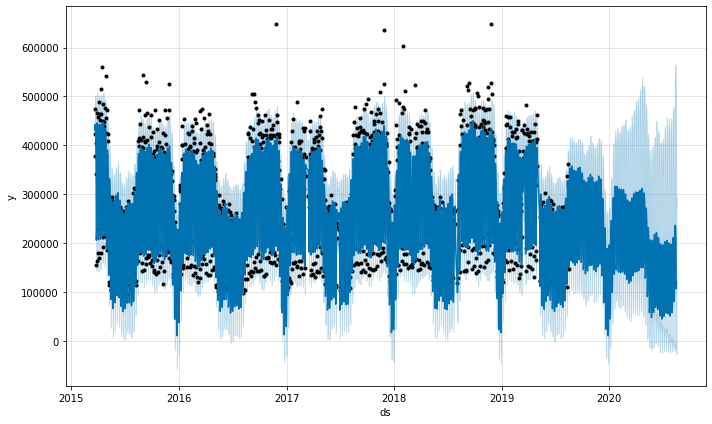

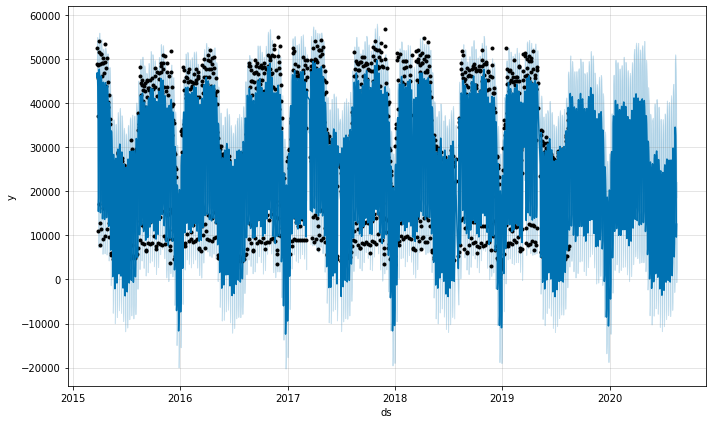

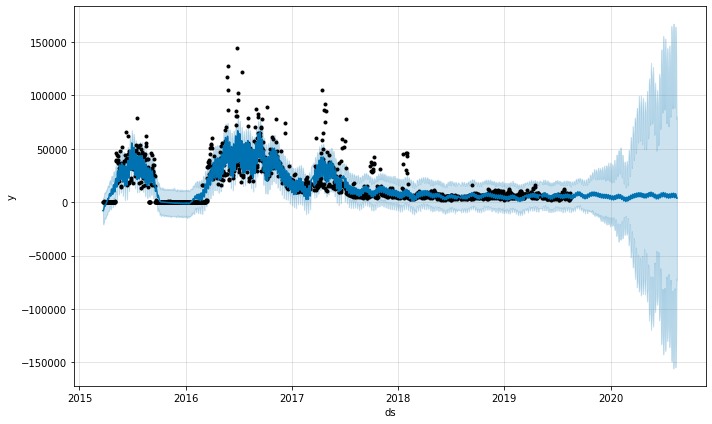

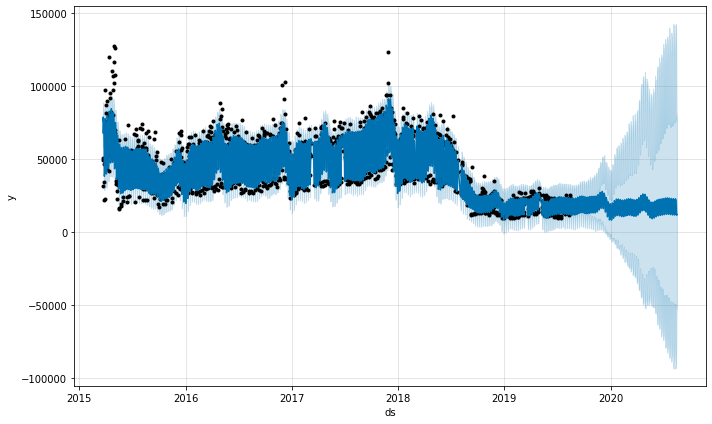

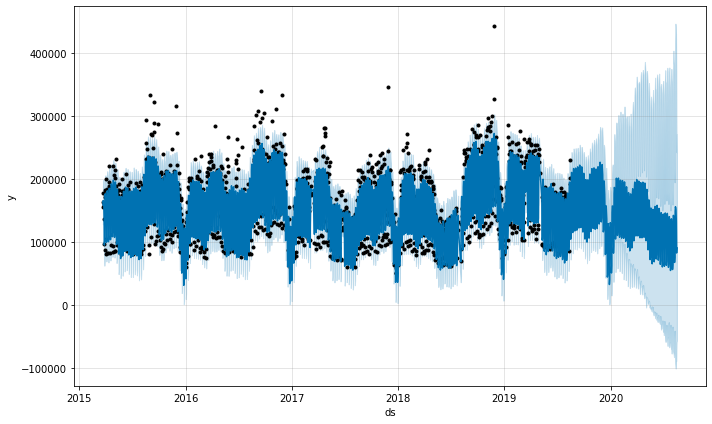

In [149]:
prediction1 = send_prediction(five_att_0_removed)

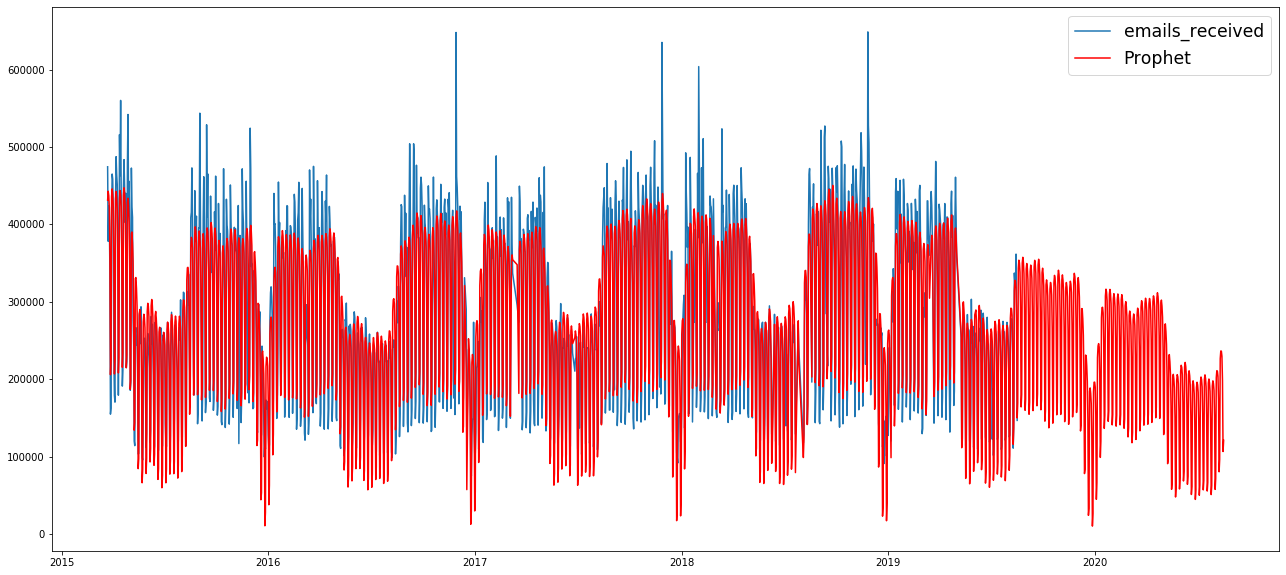

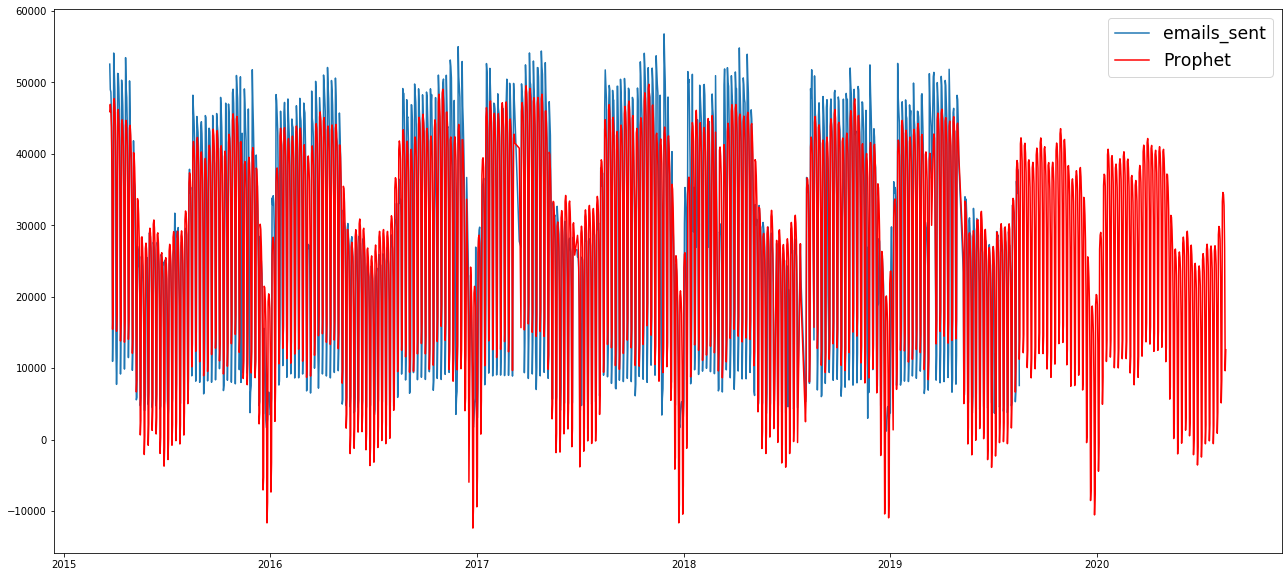

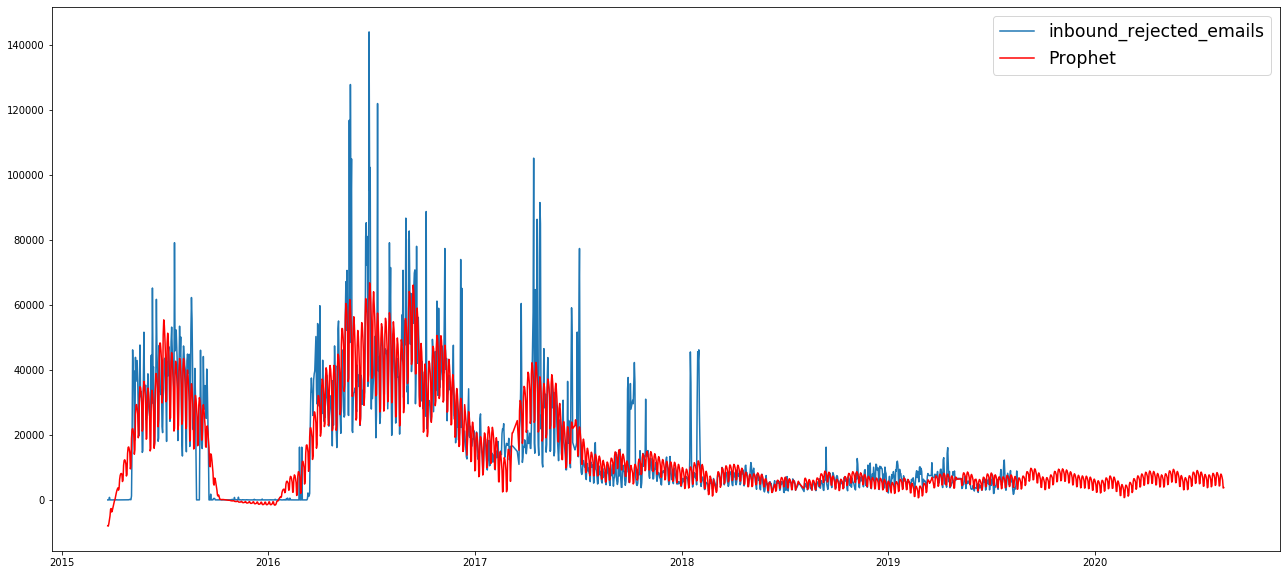

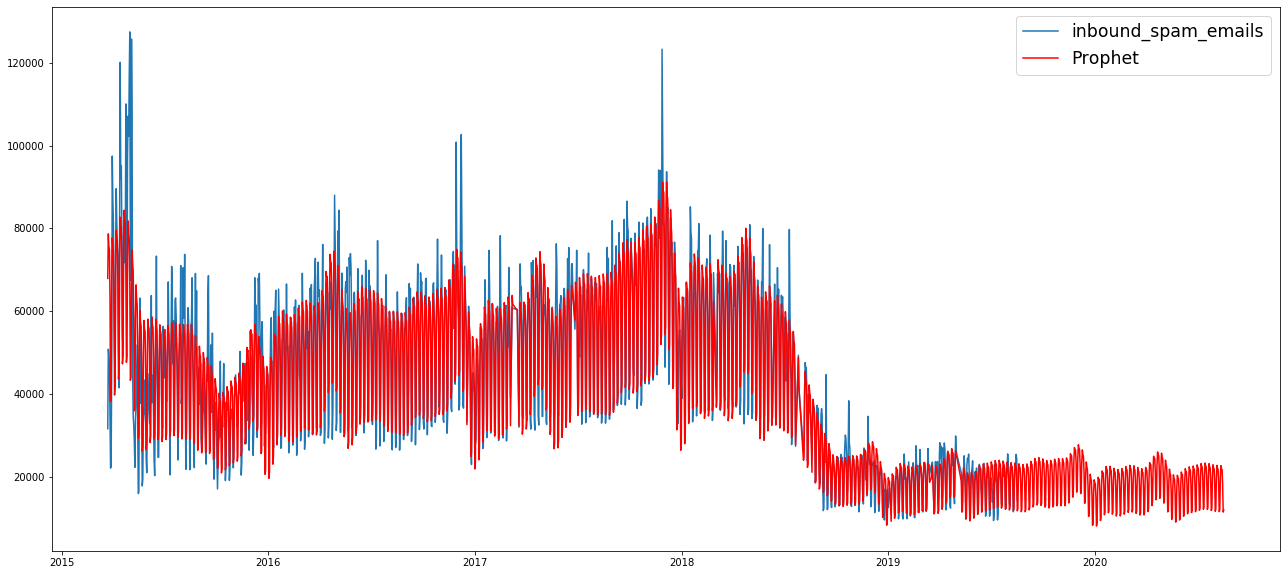

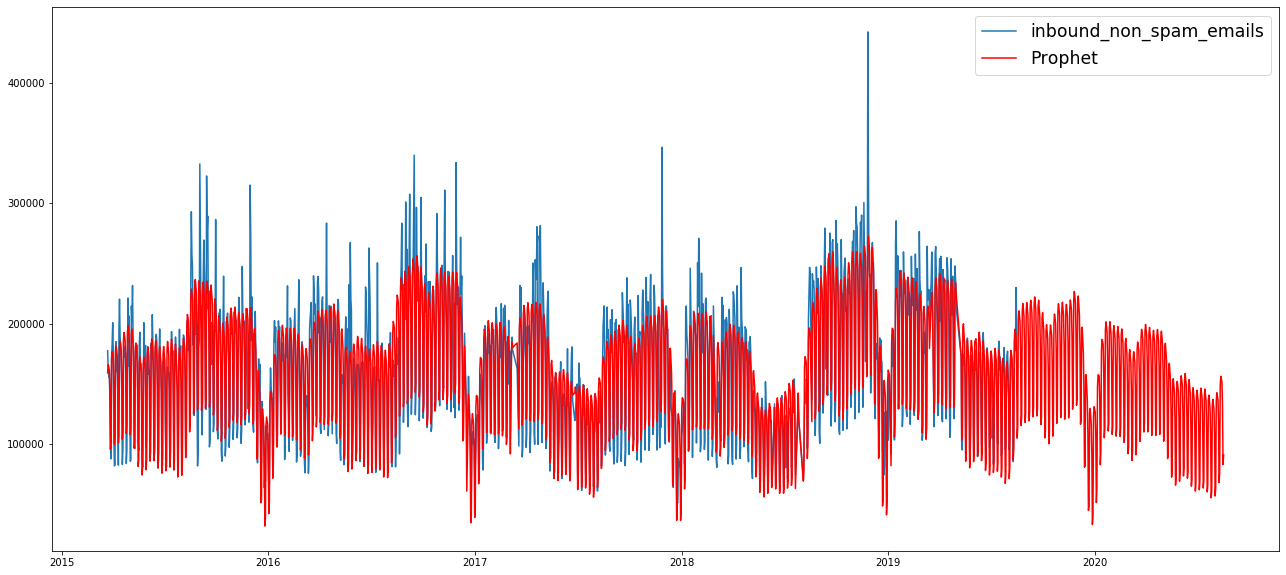

In [150]:
plot(five_att_0_removed,prediction1)